In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.transforms as transforms
#import OccupancyGridMapping as OGM
%matplotlib inline

class Map(object):
    """ 
    The Map class stores an occupancy grid as a two dimensional
    numpy array. 
    
    Public instance variables:

        width      --  Number of columns in the occupancy grid.
        height     --  Number of rows in the occupancy grid.
        resolution --  Width of each grid square in meters. 
        origin_x   --  Position of the grid cell (0,0) in 
        origin_y   --    in the map coordinate system.
        grid       --  numpy array with height rows and width columns.
        
    
    Note that x increases with increasing column number and y increases
    with increasing row number. 
    """

    def __init__(self, origin_x=-2.5, origin_y=-2.5, resolution=.1, 
                 width=50, height=50):
        """ Construct an empty occupancy grid.
        
        Arguments: origin_x, 
                   origin_y  -- The position of grid cell (0,0) in the
                                map coordinate frame.
                   resolution-- width and height of the grid cells 
                                in meters.
                   width, 
                   height    -- The grid will have height rows and width
                                columns cells.  width is the size of
                                the x-dimension and height is the size
                                of the y-dimension.
                                
         The default arguments put (0,0) in the center of the grid. 
                                
        """
        self.origin_x = origin_x
        self.origin_y = origin_y
        self.resolution = resolution
        self.width = width 
        self.height = height 
        self.grid = np.zeros((height, width))

    def to_message(self):
        """ Return a nav_msgs/OccupancyGrid representation of this map. """
     
        grid_msg = OccupancyGrid()

        # Set up the header.
        grid_msg.header.stamp = rospy.Time.now()
        grid_msg.header.frame_id = "map"

        # .info is a nav_msgs/MapMetaData message. 
        grid_msg.info.resolution = self.resolution
        grid_msg.info.width = self.width
        grid_msg.info.height = self.height
        
        # Rotated maps are not supported... quaternion represents no
        # rotation. 
        grid_msg.info.origin = Pose(Point(self.origin_x, self.origin_y, 0),
                               Quaternion(0, 0, 0, 1))

        # Flatten the numpy array into a list of integers from 0-100.
        # This assumes that the grid entries are probalities in the
        # range 0-1. This code will need to be modified if the grid
        # entries are given a different interpretation (like
        # log-odds).
        flat_grid = self.grid.reshape((self.grid.size,)) * 100
        grid_msg.data = list(np.round(flat_grid))
        return grid_msg

    def set_cell(self, x, y, val):
        """ Set the value of a cell in the grid. 

        Arguments: 
            x, y  - This is a point in the map coordinate frame.
            val   - This is the value that should be assigned to the
                    grid cell that contains (x,y).

        This would probably be a helpful method!  Feel free to throw out
        point that land outside of the grid. 
        """
        pass


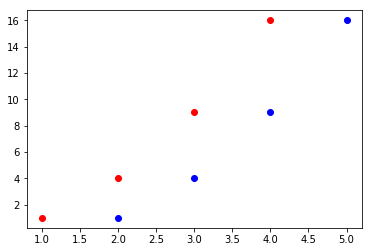

In [4]:
plt.plot([1,2,3,4],[1,4,9,16],'ro',[2,3,4,5],[1,4,9,16],'bo')
plt.show()

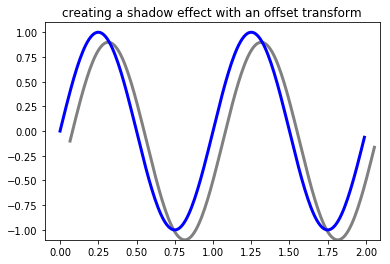

Affine2D(array([[ 72.,   0.,   0.],
       [  0.,  72.,   0.],
       [  0.,   0.,   1.]]))


In [5]:
#An example for the scaled translation but it is not able to do the inverse means can't find offset

fig = plt.figure()
ax = fig.add_subplot(111)

# make a simple sine wave
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)
line, = ax.plot(x, y, lw=3, color='blue')

# shift the object over 2 points, and down 2 points
dx, dy = 10/72., -10/72.
offset = transforms.ScaledTranslation(dx, dy,
  fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
ax.plot(x, y, lw=3, color='gray',
  transform=shadow_transform,
  zorder=0.5*line.get_zorder())

ax.set_title('creating a shadow effect with an offset transform')
plt.show()
print(fig.dpi_scale_trans)

In [ ]:
plt.setp(line)

In [ ]:
print(line.zorder)

In [6]:
# Starting of Code

numScans = 10 #Total no of scans in laserMsg
initialPose = np.array([0, 0, 0])# Initial Pose of Robot
poseList = np.zeros((numScans,3))# Initialise all the positions at scan time as [0 0 0]
poseList[0] = initialPose
transform = initialPose
print(poseList)

[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [12]:
# Created an Occupancy Grid With The Help of Above Object
map = Map(origin_x=-7.5, origin_y=-7.5, resolution=20, 
                 width=15, height=15)

['origin_x', 'origin_y', 'resolution', 'width', 'height', 'grid']

In [1]:
# Loop through all the scans and calculate the relative poses between them
for idx in range(1,numScans):
    # Process the data in pairs.
    
    referenceScan = lidarScan[idx-1]
    
    #currentScanMsg = laserMsg{idx};
    #currentScan = lidarScan(currentScanMsg);
    
    currentScan = lidarScan[idx]
    
    # Run scan matching. Note that the scan angles stay the same and do
    # not have to be recomputed. To increase accuracy, set the maximum
    # number of iterations to 500. Use the transform from the last
    # iteration as the initial estimate.
    
    ''''
    Can't find the below function which returns the offset b/w two curves
    
    
    transform, stats = matchScans(currentScan, referenceScan, ...
        'MaxIterations', 500, 'InitialPose', transform)

    # The |Score| in the statistics structure is a good indication of the
    # quality of the scan match.
    if( stats.Score / currentScan.Count < 1.0 ):
        disp(['Low scan match score for index ' num2str(idx) '. Score = ' num2str(stats.Score) '.'])
    

    # Maintain the list of robot poses.
    absolutePose = exampleHelperComposeTransform(poseList(idx-1,:), transform);
    poseList(idx,:) = absolutePose;

    # Integrate the current laser scan into the probabilistic occupancy
    # grid.
    insertRay(map, absolutePose, currentScan, double(currentScanMsg.RangeMax));
    ''''

SyntaxError: invalid syntax (<ipython-input-1-168eaf68bf9e>, line 18)

In [13]:
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10, 10)

def convert2xy(scans):
    angles_loc = np.deg2rad(np.linspace(-120, 120, 682))
    valid_obj = scans > 0.02
    return (np.array([scans*np.cos(angles_loc), scans*np.sin(angles_loc)]).swapaxes(0, 1).swapaxes(1, 2).reshape(-1, 2)
            , valid_obj.ravel())

def rot(points, angle):
    return np.append([np.cos(angle)*points[:, 0]-np.sin(angle)*points[:, 1]], 
                     [np.sin(angle)*points[:, 0]+np.cos(angle)*points[:, 1]], axis = 0).T
    # pass # rotated_points

def integr(deltas):
    angles =  np.cumsum(np.append([0], deltas[:, 2], axis=0), axis=0)
    return np.append(np.cumsum(np.append([[0, 0]], 
                              rot(deltas[:, :2], angles[1:]), axis = 0), axis=0), 
                    angles.reshape(-1, 1), axis=-1)#trajectory

def plot_points_cloud(trajectory, scans, valid, verbose=True):
    plt.figure()
    x, y, angles = trajectory[:, 0], trajectory[:, 1], trajectory[:, 2]
    if verbose:
        plt.plot(x, y, lw=3, c='blue')
    clouds = rot(scans[valid], np.repeat(angles, 682)[valid]) + (np.repeat(trajectory[:, :2], 682, axis=0))[valid]
    if verbose:
        plt.scatter(clouds[:, 0], 
                    clouds[:, 1], s=0.5, c='r')
    # pass # figure

if __name__ == "__main__":
  scans = np.load("scans.npy")
  deltas = np.load("deltas.npy")
  
  ## No cycles, only numpy, but different function syntax: convert2xy, plot_points_cloud
  import time
  tm = time.time()
  trajectory = integr(deltas)
  xy_scans, valid = convert2xy(scans)
  plot_points_cloud(trajectory, xy_scans, valid, verbose=False)
  print("Past: {} sec".format(time.time() - tm))
  # 0.7 sec if verbose=False -> no plotting only computations
  # 11 sec with plotting ()a lot of points
  

FileNotFoundError: [Errno 2] No such file or directory: 'scans.npy'